In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
data = pd.read_csv("/Users/Irving/Documents/Metodos_numericos/ProyectoFinal/data-2023-05-03.csv")
data.head()

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,2021
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,2021
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,2021
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,2021
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,2021


In [3]:
data.shape

(479700, 9)

In [4]:
data.tail()

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,..anio_fecha
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes sur,Prepago,19844,2023-03,2023
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes sur,Gratuidad,2306,2023-03,2023
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,2023
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,2023
479699,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Gratuidad,579,2023-03,2023


In [5]:
df_l2 = data.loc[data['linea']=='Linea 2']

In [6]:
df_l2['estacion'].unique()

array(['Allende', 'Bellas Artes', 'Chabacano', 'Colegio Militar',
       'Cuatro Caminos', 'CuitlÃ¡huac', 'Ermita', 'General Anaya',
       'Hidalgo', 'Nativitas', 'Normal', 'Panteones', 'Pino SuÃ¡rez',
       'Popotla', 'Portales', 'RevoluciÃ³n', 'San Antonio Abad',
       'San Cosme', 'Tacuba', 'TasqueÃ±a', 'Viaducto', 'Villa de CortÃ©s',
       'Xola', 'ZÃ³calo', 'Cuitláhuac', 'Revolución', 'Zócalo',
       'Pino Suárez', 'Villa de Cortés', 'Tasqueña', 'Cuatro caminos',
       'Cuitlï¿½ï¿½', 'Revoluciï¿½', 'Zï¿½ï¿½calo/Tenochti',
       'Pino Suï¿½ï¿', 'Villa de Cortes', 'Tasqueï¿½'], dtype=object)

In [7]:
data["estacion"].unique().tolist()

['Balbuena',
 'Balderas',
 'Blvd. Puerto AÃ©reo',
 'Candelaria',
 'Chapultepec',
 'CuauhtÃ©moc',
 'GÃ³mez FarÃ\xadas',
 'Insurgentes',
 'Isabel la CatÃ³lica',
 'JuanacatlÃ¡n',
 'Merced',
 'Moctezuma',
 'Observatorio',
 'PantitlÃ¡n',
 'Pino SuÃ¡rez',
 'Salto del Agua',
 'San LÃ¡zaro',
 'Sevilla',
 'Tacubaya',
 'Zaragoza',
 '20 de Noviembre',
 'Atlalilco',
 'Calle 11',
 'CulhuacÃ¡n',
 'Eje Central',
 'Ermita',
 'Insurgentes Sur',
 'Lomas Estrella',
 'Mexicaltzingo',
 'Mixcoac',
 'Nopalera',
 'Olivos',
 'Parque de los Venados',
 'PerifÃ©rico Oriente',
 'San AndrÃ©s TomatlÃ¡n',
 'Tezonco',
 'TlÃ¡huac',
 'Tlaltenco',
 'Zapata',
 'ZapotitlÃ¡n',
 'Allende',
 'Bellas Artes',
 'Chabacano',
 'Colegio Militar',
 'Cuatro Caminos',
 'CuitlÃ¡huac',
 'General Anaya',
 'Hidalgo',
 'Nativitas',
 'Normal',
 'Panteones',
 'Popotla',
 'Portales',
 'RevoluciÃ³n',
 'San Antonio Abad',
 'San Cosme',
 'Tacuba',
 'TasqueÃ±a',
 'Viaducto',
 'Villa de CortÃ©s',
 'Xola',
 'ZÃ³calo',
 'Centro MÃ©dico',
 'Copilco',

In [8]:
mapeo_valores = {"Blvd. Puerto AÃ©reo" : "Blvd. Puerto Aéreo", "CuauhtÃ©moc" : "Cuauhtémoc",
                 "GÃ³mez FarÃ\xadas" : "Gómez Farías", "Isabel la CatÃ³lica" : "Isabel la Católica",
                 "JuanacatlÃ¡n" : "Juanacatlán", "PantitlÃ¡n" : "Pantitlán", 
                 "Pino SuÃ¡rez" : "Pino Suárez", "San LÃ¡zaro" : "San Lázaro", 
                 "CulhuacÃ¡n" : "Culhuacán", "PerifÃ©rico Oriente" : "Periférico Oriente", 
                 "San AndrÃ©s TomatlÃ¡n" : "San Andrés Tomatlán", "TlÃ¡huac" : "Tláhuac", 
                 "ZapotitlÃ¡n" : "Zapotitlán", "CuitlÃ¡huac" : "Cuitláhuac", 
                 "RevoluciÃ³n" : "Revolución", "TasqueÃ±a" : "Tasqueña", 
                 "Villa de CortÃ©s" : "Villa de Cortés", "ZÃ³calo" : "Zócalo",
                 "Centro MÃ©dico" : "Centro Médico", "CoyoacÃ¡n" : "Coyoacán", 
                 "DivisiÃ³n del Norte" : "División del Norte", "EtiopÃ\xada" : "Etiopía/Plaza de la Transparencia", 
                 "JuÃ¡rez" : "Juárez", "NiÃ±os HÃ©roes" : "Niños Héroes", 
                 "MartÃ\xadn Carrera" : "Martín Carrera", "TalismÃ¡n" : "Talismán", 
                 "AragÃ³n" : "Aragón", "Inst. del PetrÃ³leo" : "Instituto del Petróleo", 
                 "OceanÃ\xada" : "Oceanía", "PolitÃ©cnico" : "Politécnico", 
                 "Terminal AÃ©rea" : "Terminal Aérea", "Valle GÃ³mez" : "Valle Gómez", 
                 "FerrerÃ\xada" : "Ferrería", "Aquiles SerdÃ¡n" : "Aquiles Serdán",
                 "RefinerÃ\xada" : "Refinería", "San JoaquÃ\xadn" : "San Joaquín", 
                 "ConstituciÃ³n de 1917" : "Constitución de 1917", "EscuadrÃ³n 201" : "Escuadrón 201", 
                 "San Juan LetrÃ¡n" : "San Juan de Letrán", "U A M  I" : "UAM-I",
                 "LÃ¡zaro CÃ¡rdenas" : "Lázaro Cárdenas", "VelÃ³dromo" : "Velódromo",
                 "AgrÃ\xadcola Oriental" : "Agrícola Oriental", "PeÃ±Ã³n Viejo" : "Peñón Viejo",
                 "Bosque de AragÃ³n" : "Bosque de Aragón", "Deportivo OceanÃ\xada" : "Deportivo Oceanía", 
                 "MÃºzquiz" : "Múzquiz", "NezahualcÃ³yotl" : "Nezahualcóyotl", 
                 "OlÃ\xadmpica" : "Olímpica", "Plaza AragÃ³n" : "Plaza Aragón", 
                 "Ricardo Flores MagÃ³n" : "Ricardo Flores Magón", "RÃ\xado de los Remedios" : "Río de los Remedios",
                 "Villa de AragÃ³n" : "Villa de Aragón", "Inst. del Petróleo" : "Instituto del Petróleo", 
                 "Pantitlï¿½" : "Pantitlán", "Gï¿½ï¿½mez Fa" : "Gómez Farías", 
                 "Boulevard Puerto Aï¿½ï¿" : "Blvd. Puerto Aéreo", "San Lï¿½ï¿½" : "San Lázaro",
                 "Pino Suï¿½ï¿" : "Pino Suárez", "Isabel la Catï¿½ï¿½" : "Isabel la Católica",
                 "Cuauhtï¿½ï¿" : "Cuauhtémoc", "Juanacatlï¿½" : "Juanacatlán",
                 "Cuatro caminos" : "Cuatro Caminos", "Cuitlï¿½ï¿½" : "Cuitláhuac", 
                 "Revoluciï¿½" : "Revollución", "Zï¿½ï¿½calo/Tenochti" : "Zócalo", 
                 "Tasqueï¿½" : "Tasqueña", "Deportivo 18 de marzo" : "Deportivo 18 de Marzo",
                 "Juï¿½ï¿" : "Juárez", "Niï¿½ï¿½os Hï¿" : "Niños Héroes", 
                 "Centro Mï¿½ï¿½" : "Centro Médico", "Etiopï¿½ï¿½a/Plaza de la Transpare" : "Etiopía/Plaza de la Transparencia",
                 "Divisiï¿½ï¿½n del N" : "División del Norte", "Coyoacï¿½" : "Coyoacán",
                 "Miguel ï¿½ï¿½ngel de Que" : "Miguel Ángel de Quevedo", "Talismï¿½" : "Talismán", 
                 "Martï¿½ï¿½n Car" : "Martín Carrera", "Politï¿½ï¿½c" : "Politécnico", 
                 "Instituto del Petrï¿½ï¿" : "Instituto del Petróleo", "Valle Gï¿½ï¿" : "Valle Gómez",
                 "Aragï¿½" : "Aragón", "Oceanï¿½" : "Oceanía",
                 "Terminal Aï¿½ï¿" : "Terminal Aéria", "Tezozï¿½ï¿" : "Tezozómoc", 
                 "Ferrerï¿½ï¿½a/Arena Ciudad de Mï¿" : "Ferrería",  "La Villa/Basï¿½ï¿½" : "La Villa-Basílica",
                 "Aquiles Serdï¿½" : "Aquiles Serdán", "Refinerï¿½" : "Refinería",
                 "San Joaquï¿½" : "San Joaquín", "Garibaldi/Lagun" : "Garibaldi", 
                 "San Juan de Letrï¿½" : "San Juan de Letrán", "Escuadrï¿½ï¿½n" : "Escuadrón 201",
                 "Constituciï¿½ï¿½n de" : "Constitución de 1917", "Velï¿½ï¿½d" : "Velódromo",
                 "Lï¿½ï¿½zaro Cï¿½ï" : "Lázaro Cárdenas", "Agrï¿½ï¿½cola Orie" : "Agrícola Oriental", 
                 "Peï¿½ï¿½ï¿½ï¿" : "Peñón Viejo", "Garibaldi/Lagunilla" : "Garibaldi", 
                 "Ricardo Flores Magï¿½" : "Ricardo Flores Magón", "Deportivo Oceanï¿½" : "Deportivo Oceanía", 
                 "Bosque de Aragï¿½" : "Bosque de Aragón", "Villa de Aragï¿½" : "Villa de Aragón",
                 "Nezahualcï¿½ï¿½" : "Nezahualcóyotl", "Rï¿½ï¿½o de los Reme" : "Río de los Remedios", 
                 "Mï¿½ï¿½z" : "Múzquiz", "Olimpica" : "Olímpica",
                 "Plaza Aragï¿½" : "Plaza Aragón", "Tlï¿½ï¿½" : "Tláhuac", 
                 "Zapotitlï¿½" : "Zapotitlán", "Perifï¿½ï¿½rico Ori" : "Periférico Oriente", 
                 "San Andrï¿½ï¿½s Tomat" : "San Andrés Tomatlán", "Culhuacï¿½" : "Culhuacán",
                 "Parque de los venados" : "Parque de los Venados", "Hospital 20 de noviembre" : "Hospital 20 de Noviembre", 
                 "Insurgentes sur" : "Insurgentes Sur"}

In [9]:
data["estacion"] = data["estacion"].replace(mapeo_valores)

In [10]:
estaciones = data["estacion"].unique().tolist()

In [11]:
estaciones.sort()
estaciones

['20 de Noviembre',
 'Acatitla',
 'Aculco',
 'Agrícola Oriental',
 'Allende',
 'Apatlaco',
 'Aquiles Serdán',
 'Aragón',
 'Atlalilco',
 'Auditorio',
 'Autobuses del Norte',
 'Azcapotzalco',
 'Balbuena',
 'Balderas',
 'Barranca del Muerto',
 'Bellas Artes',
 'Blvd. Puerto Aéreo',
 'Bondojito',
 'Bosque de Aragón',
 'Buenavista',
 'Calle 11',
 'Camarones',
 'Canal de San Juan',
 'Canal del Norte',
 'Candelaria',
 'Centro Médico',
 'Cerro de la Estrella',
 'Chabacano',
 'Chapultepec',
 'Chilpancingo',
 'Ciudad Azteca',
 'Ciudad Deportiva',
 'Colegio Militar',
 'Constitución de 1917',
 'Constituyentes',
 'Consulado',
 'Copilco',
 'Coyoacán',
 'Coyuya',
 'Cuatro Caminos',
 'Cuauhtémoc',
 'Cuitláhuac',
 'Culhuacán',
 'Deportivo 18 de Marzo',
 'Deportivo Oceanía',
 'Deptvo. 18 de Marzo',
 'División del Norte',
 'Doctores',
 'Ecatepec',
 'Eduardo Molina',
 'Eje Central',
 'El Rosario',
 'Ermita',
 'Escuadrón 201',
 'Etiopía',
 'Etiopía/Plaza de la Transparencia',
 'Eugenia',
 'Ferrería',
 'Fra

In [12]:
segundo_mapeo_de_valores = {"20 de Noviembre" : "Hospital 20 de Noviembre",
                            "Deptvo. 18 de Marzo" : "Deportivo 18 de Marzo",
                            "Etiopía" : "Etiopía/Plaza de la Transparencia",
                            "La Villa-Basilica" : "La Villa-Basílica",
                            "Miguel A. de Q." : "Miguel Ángel de Quevedo",
                            "Revollución" : "Revolución",
                            "San Juan Letrán" : "San Juan de Letrán",
                            "San Pedro los Pinos" : "San Pedro de los Pinos",
                            "Terminal Aéria" : "Terminal Aérea",
                            "Tezozomoc" : "Tezozómoc",
                            "Villa de Cortes" : "Villa de Cortés",
                            "Viveros" : "Viveros/Derechos Humanos",
                            "Blvd. Puerto Aéreo" : "Boulevard Puerto Aéreo"}

In [13]:
data["estacion"] = data["estacion"].replace(segundo_mapeo_de_valores)

In [14]:
estaciones = data["estacion"].unique().tolist()

In [15]:
estaciones.sort()
estaciones

['Acatitla',
 'Aculco',
 'Agrícola Oriental',
 'Allende',
 'Apatlaco',
 'Aquiles Serdán',
 'Aragón',
 'Atlalilco',
 'Auditorio',
 'Autobuses del Norte',
 'Azcapotzalco',
 'Balbuena',
 'Balderas',
 'Barranca del Muerto',
 'Bellas Artes',
 'Bondojito',
 'Bosque de Aragón',
 'Boulevard Puerto Aéreo',
 'Buenavista',
 'Calle 11',
 'Camarones',
 'Canal de San Juan',
 'Canal del Norte',
 'Candelaria',
 'Centro Médico',
 'Cerro de la Estrella',
 'Chabacano',
 'Chapultepec',
 'Chilpancingo',
 'Ciudad Azteca',
 'Ciudad Deportiva',
 'Colegio Militar',
 'Constitución de 1917',
 'Constituyentes',
 'Consulado',
 'Copilco',
 'Coyoacán',
 'Coyuya',
 'Cuatro Caminos',
 'Cuauhtémoc',
 'Cuitláhuac',
 'Culhuacán',
 'Deportivo 18 de Marzo',
 'Deportivo Oceanía',
 'División del Norte',
 'Doctores',
 'Ecatepec',
 'Eduardo Molina',
 'Eje Central',
 'El Rosario',
 'Ermita',
 'Escuadrón 201',
 'Etiopía/Plaza de la Transparencia',
 'Eugenia',
 'Ferrería',
 'Fray Servando',
 'Garibaldi',
 'General Anaya',
 'Guela

In [16]:
data.head()

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,2021
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,2021
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,2021
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,2021
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,2021


In [17]:
my_data = pd.read_csv("/Users/Irving/Documents/Metodos_numericos/ProyectoFinal/Lineas_limpio.csv")

In [18]:
my_data.head()

,Unnamed: 0,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,2021
1,1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,2021
2,2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,2021
3,3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,2021
4,4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,2021


In [19]:
my_data = my_data.drop("Unnamed: 0", axis=1)

In [20]:
my_data.head()

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,2021
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,2021
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,2021
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,2021
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,2021


In [21]:
my_data.tail()

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,..anio_fecha
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,2023
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,2023
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,2023
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,2023
479699,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Gratuidad,579,2023-03,2023


In [22]:
pruebas = my_data

In [23]:
pruebas["fecha"] = pd.to_datetime(pruebas["fecha"], format="%Y/%m/%d")

In [24]:
pruebas["dia_de_la_semana"] = pruebas["fecha"].dt.day_name()

In [25]:
pruebas

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,..anio_fecha,dia_de_la_semana
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,2021,Friday
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,2021,Friday
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,2021,Friday
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,2021,Friday
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,2021,Friday
...,...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,2023,Friday
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,2023,Friday
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,2023,Friday
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,2023,Friday


In [26]:
pruebas = pruebas.drop("..anio_fecha", axis=1)

In [27]:
pruebas

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,dia_de_la_semana
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Friday
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Friday
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Friday
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Friday
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Friday
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Friday
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Friday
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Friday
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Friday


In [28]:
dias = pruebas["dia_de_la_semana"].unique()
dias

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [29]:
dic_dias = {"Friday" : "Viernes",
            "Saturday" : "Sábado",
            "Sunday" : "Domingo",
            "Monday" : "Lunes",
            "Tuesday" : "Martes",
            "Wednesday" : "Miércoles",
            "Thursday" : "Jueves",}

In [30]:
pruebas.dia_de_la_semana = pruebas.dia_de_la_semana.replace(dic_dias)

In [31]:
dias = pruebas["dia_de_la_semana"].unique()
dias

array(['Viernes', 'Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles',
       'Jueves'], dtype=object)

In [32]:
pruebas

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,dia_de_la_semana
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


In [33]:
pruebas.duplicated().sum()

0

In [34]:
pruebas.isnull().sum()

fecha               0
mes                 0
anio                0
linea               0
estacion            0
tipo_pago           0
afluencia           0
temporal_fecha      0
dia_de_la_semana    0
dtype: int64

In [35]:
my_data = pruebas

In [36]:
my_data

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,dia_de_la_semana
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


In [37]:
my_data.describe()

,anio,afluencia
count,479700.000000,479700.000000
mean,2021.664634,4373.085445
std,0.665138,6377.707687
min,2021.000000,0.000000
25%,2021.000000,704.000000
50%,2022.000000,2293.000000
75%,2022.000000,5503.000000
max,2023.000000,100483.000000


In [38]:
aflu_maxima = my_data[my_data["afluencia"] == my_data.afluencia.max()]
aflu_maxima

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,dia_de_la_semana
459034,2023-02-24,Febrero,2023,Linea 8,Constitución de 1917,Prepago,100483,2023-02,Viernes


In [39]:
my_data.value_counts('linea')

linea
Linea 2     59040
Linea 3     51660
Linea B     51660
Linea 1     49200
Linea 12    49200
Linea 8     46740
Linea 7     34440
Linea 5     31980
Linea 9     29520
Linea 6     27060
Linea 4     24600
Linea A     24600
dtype: int64

In [40]:
# my_data.value_counts('anio')

In [41]:
my_data

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,temporal_fecha,dia_de_la_semana
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


# Cambiando nombre de columnas

In [42]:
my_data = my_data.rename(columns={"anio" : "año"})

In [43]:
my_data = my_data.rename(columns={"temporal_fecha" : "año_mes"})

In [44]:
my_data = my_data.rename(columns={"fecha":"año_mes_dia", "dia_de_la_semana":"nombre_dia"})

In [45]:
my_data

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


In [46]:
my_data = my_data.drop_duplicates()
my_data = my_data.dropna()
my_data

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


In [47]:
my_data.describe()

,año,afluencia
count,479700.000000,479700.000000
mean,2021.664634,4373.085445
std,0.665138,6377.707687
min,2021.000000,0.000000
25%,2021.000000,704.000000
50%,2022.000000,2293.000000
75%,2022.000000,5503.000000
max,2023.000000,100483.000000


In [48]:
fecha_inicio = '2022-12-15'
fecha_fin = '2023-01-6'

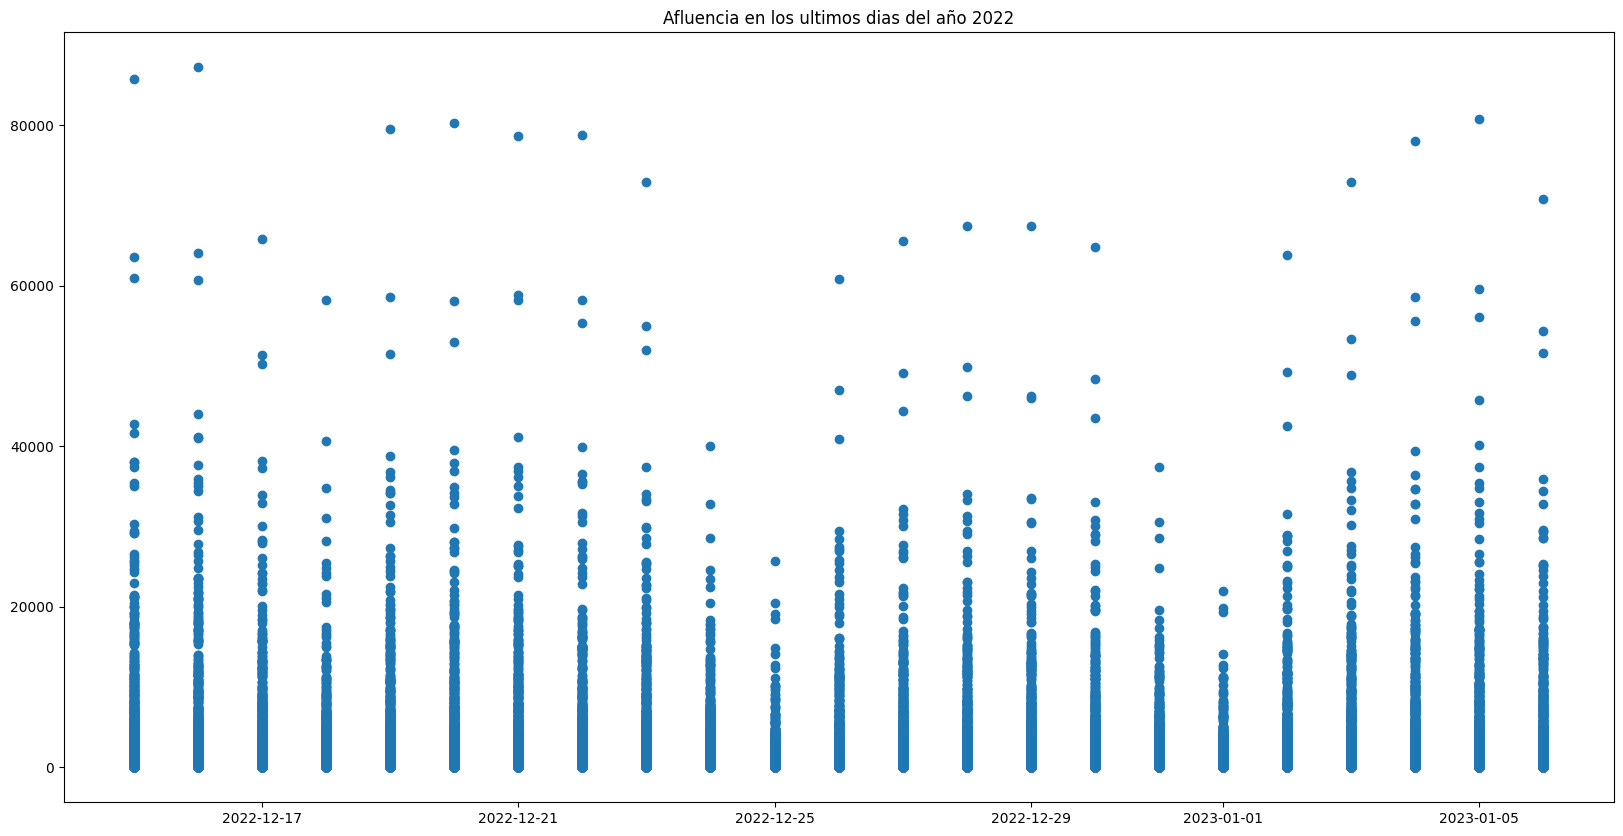

In [49]:
# my_data.loc[(my_data['año_mes_dia'] == '2023-02-24') & (my_data['estacion'] == 'Constitución de 1917')]
#df_fechas = my_data.loc[(my_data['año_mes_dia']>=fecha_inicio) & (my_data['año_mes_dia']<=fecha_fin), ['año_mes_dia', 'afluencia']]
x = my_data.loc[(my_data['año_mes_dia'] >= fecha_inicio) & (my_data['año_mes_dia'] <= fecha_fin), ['año_mes_dia', 'afluencia']]
y = my_data.loc[(my_data['año_mes_dia'] >= fecha_inicio) & (my_data['año_mes_dia'] <= fecha_fin), 'afluencia']
plt.figure(figsize=(20, 10))
plt.title('Afluencia en los ultimos dias del año 2022')
plt.scatter(x.iloc[:, 0], y)
plt.show()



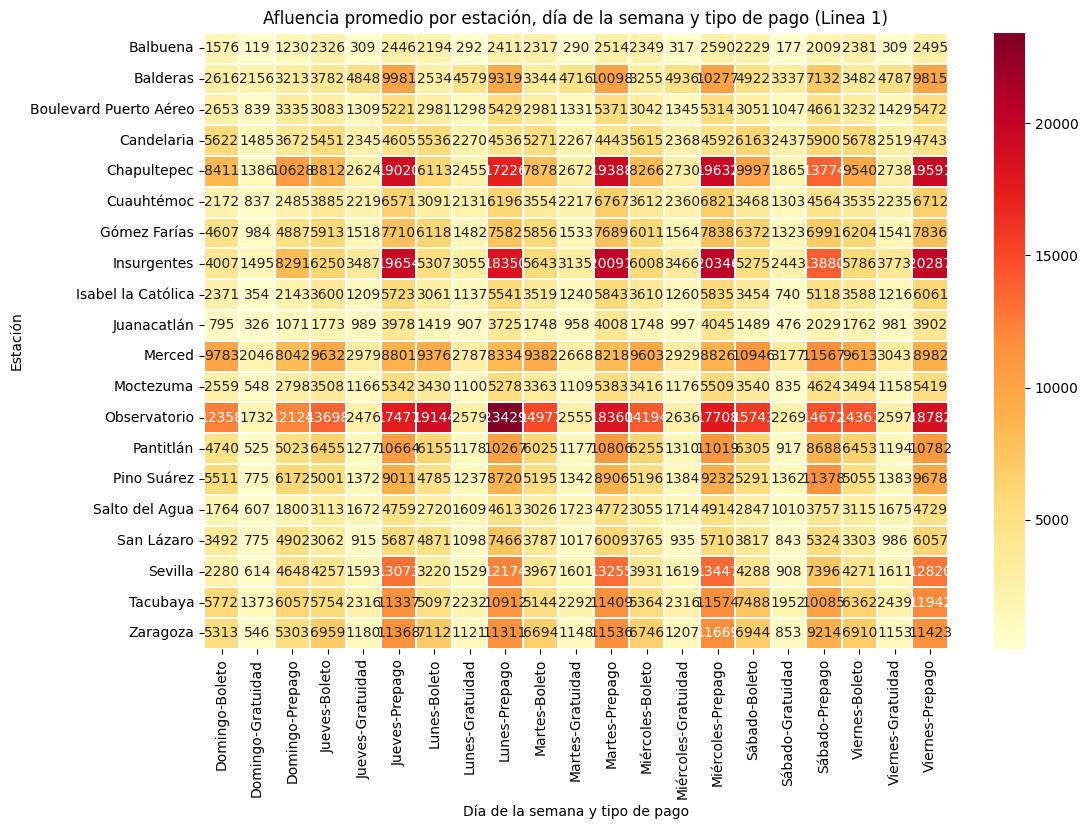

<Figure size 3000x1000 with 0 Axes>

In [50]:


# Filtrar los datos por la linea 1
linea1 = my_data[my_data['linea'] == 'Linea 1']

# Crear una tabla pivot que muestre la afluencia promedio por estación, día de la semana y tipo de pago
pivot_table = pd.pivot_table(linea1, values='afluencia', index='estacion', columns=['nombre_dia', 'tipo_pago'], aggfunc='mean')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.1, linecolor='white', annot=True, fmt='.0f')
plt.title('Afluencia promedio por estación, día de la semana y tipo de pago (Linea 1)')
plt.xlabel('Día de la semana y tipo de pago')
plt.ylabel('Estación')
plt.figure(figsize=(30, 10))
plt.show()


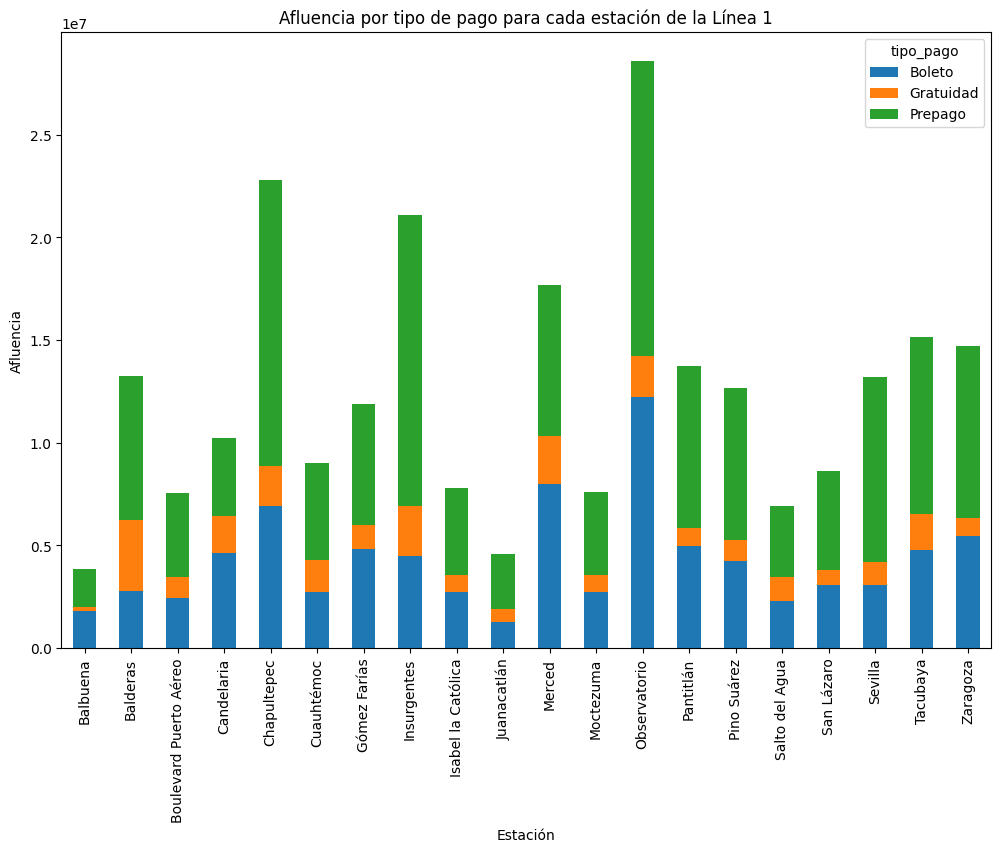

In [51]:

# Seleccionar los datos de la Línea 1
linea1 = my_data[my_data['linea'] == 'Linea 1']

# Agrupar los datos por estación y tipo de pago
grouped = linea1.groupby(['estacion', 'tipo_pago'])['afluencia'].sum().reset_index()

# Crear una tabla pivote con los datos agrupados
pivot = pd.pivot_table(grouped, index='estacion', columns='tipo_pago', values='afluencia')

# Graficar los datos como un gráfico de barras apiladas
pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Afluencia por tipo de pago para cada estación de la Línea 1')
plt.xlabel('Estación')
plt.ylabel('Afluencia')
plt.show()

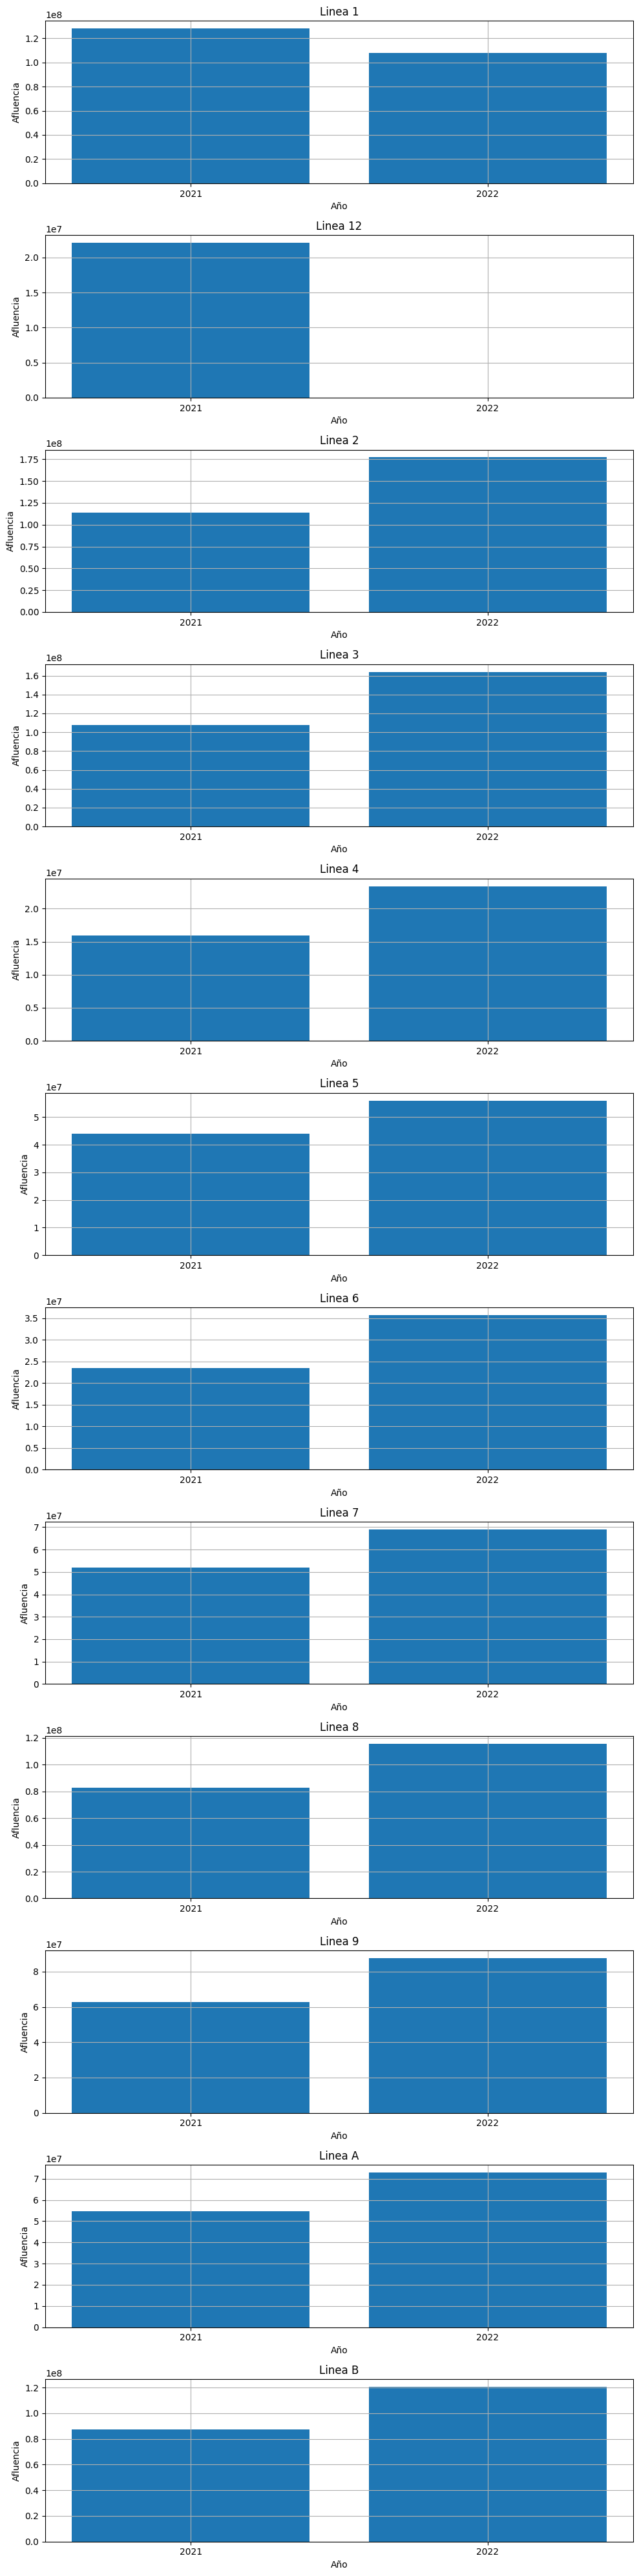

In [52]:
# Filtrar los datos para los años 2021 y 2022
df_filtrado_para_cada_linea = my_data.loc[my_data['año'].isin([2021, 2022])]

# Agrupar los datos por línea y año y calcular la afluencia total
df_agrupado_para_cada_linea = df_filtrado_para_cada_linea.groupby(['linea', 'año'])['afluencia'].sum().reset_index()

# Crear una figura con subplots para cada línea
fig, axs = plt.subplots(nrows=12, ncols=1, figsize=(10, 40))

# Iterar sobre cada línea y graficar la afluencia para cada año
for i, linea in enumerate(df_agrupado_para_cada_linea['linea'].unique()):
    df_linea = df_agrupado_para_cada_linea.loc[df_agrupado_para_cada_linea['linea'] == linea]
    axs[i].bar(df_linea['año'], df_linea['afluencia'])
    axs[i].set_title(linea)
    axs[i].set_xlabel('Año')
    axs[i].set_ylabel('Afluencia')
    axs[i].set_xticks([2021, 2022])
    axs[i].set_xticklabels(['2021', '2022'])
    axs[i].grid()

# Ajustar los subplots para que no se superpongan
plt.tight_layout()

# Mostrar la gráfica
plt.show()


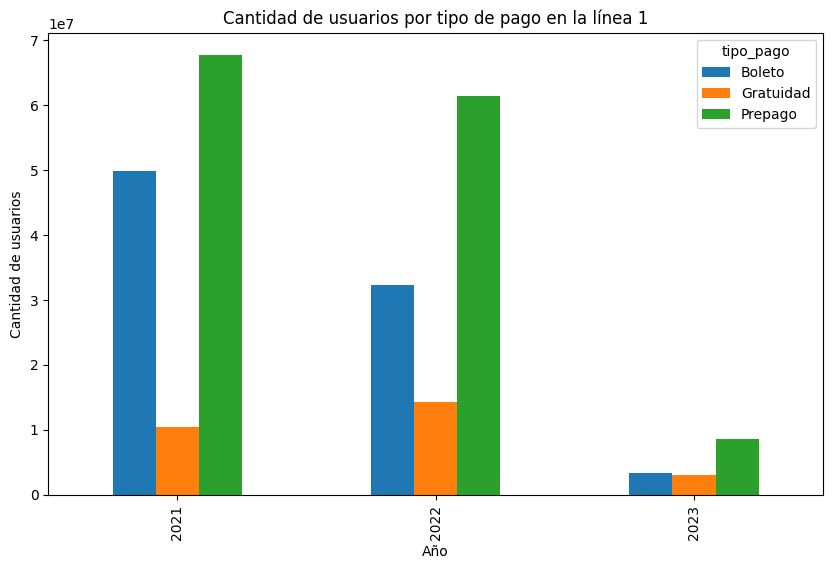

In [53]:
# Seleccionar los datos correspondientes a la línea 1 y a los años 2021, 2022 y 2023
linea_1 = my_data.loc[(my_data['linea'] == 'Linea 1') & (my_data['año'].isin([2021, 2022, 2023]))]

# Agrupar los datos por tipo de pago y año
pagos_por_año = linea_1.groupby(['tipo_pago', 'año'])['afluencia'].sum().reset_index()

# Crear una tabla pivote para visualizar los datos
pivote = pagos_por_año.pivot(index='año', columns='tipo_pago', values='afluencia')

# Graficar los datos
pivote.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de usuarios por tipo de pago en la línea 1')
plt.xlabel('Año')
plt.ylabel('Cantidad de usuarios')
plt.show()


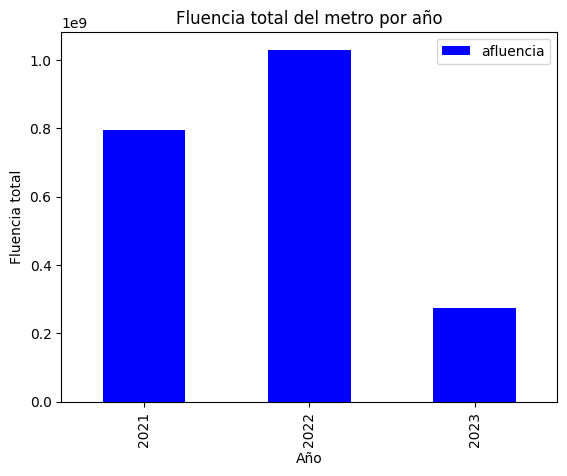

In [54]:
# Crear un DataFrame filtrando por los años 2021, 2022 y 2023
df_filtrado_años = my_data.loc[my_data['año'].isin([2021, 2022, 2023])]

# Agregar una columna con la fluencia total por año
df_fluencia_por_año = df_filtrado_años.groupby('año')['afluencia'].sum().reset_index()

# Crear la gráfica de barras
ax = df_fluencia_por_año.plot(kind='bar', x='año', y='afluencia', color='blue')

# Añadir título y etiquetas a los ejes
ax.set_title('Fluencia total del metro por año')
ax.set_xlabel('Año')
ax.set_ylabel('Fluencia total')

# Mostrar la gráfica
plt.show()

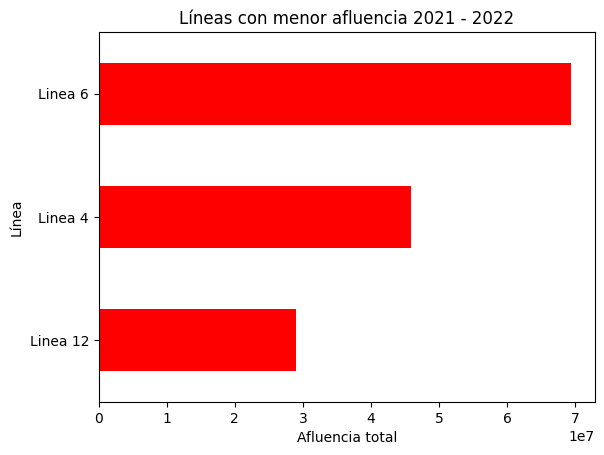

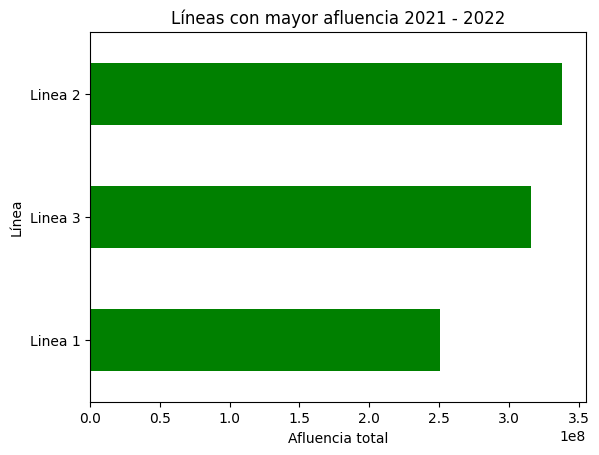

In [55]:
# calcular la afluencia total por línea
afluencia_por_linea = df_filtrado_años.groupby('linea')['afluencia'].sum()

# ordenar las líneas por afluencia
afluencia_por_linea_ordenada = afluencia_por_linea.sort_values()

# graficar las tres líneas con menor afluencia
afluencia_por_linea_ordenada.head(3).plot(kind='barh', color='red')
plt.title('Líneas con menor afluencia 2021 - 2022')
plt.xlabel('Afluencia total')
plt.ylabel('Línea')
plt.show()

# graficar las tres líneas con mayor afluencia
afluencia_por_linea_ordenada.tail(3).plot(kind='barh', color='green')
plt.title('Líneas con mayor afluencia 2021 - 2022')
plt.xlabel('Afluencia total')
plt.ylabel('Línea')
plt.show()


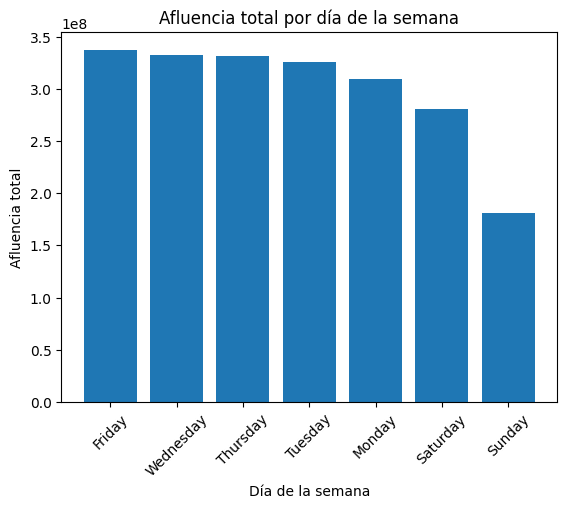

In [56]:

# Convertir la columna de la fecha a un formato de fecha de pandas
my_data['año_mes_dia'] = pd.to_datetime(my_data['año_mes_dia'])

# Crear una nueva columna con el día de la semana
my_data['nombre_dia'] = pd.to_datetime(my_data['año_mes_dia']).dt.day_name()

# Agrupar por día de la semana y calcular la suma de la afluencia
df_grouped = my_data.groupby('nombre_dia')['afluencia'].sum().reset_index()

# Ordenar los datos de manera descendente
df_grouped = df_grouped.sort_values('afluencia', ascending=False)

# Crear la gráfica de barras
plt.bar(df_grouped['nombre_dia'], df_grouped['afluencia'])

# Agregar etiquetas al gráfico
plt.title("Afluencia total por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Afluencia total")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


In [57]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479700 entries, 0 to 479699
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   año_mes_dia  479700 non-null  datetime64[ns]
 1   mes          479700 non-null  object        
 2   año          479700 non-null  int64         
 3   linea        479700 non-null  object        
 4   estacion     479700 non-null  object        
 5   tipo_pago    479700 non-null  object        
 6   afluencia    479700 non-null  int64         
 7   año_mes      479700 non-null  object        
 8   nombre_dia   479700 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 36.6+ MB


In [58]:
my_data.nombre_dia = my_data.nombre_dia.replace(dic_dias)

In [59]:
vaar = my_data
vaar

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


In [60]:
def createDummies(data_frame, var_name):
    dummy = pd.get_dummies(data_frame[var_name], prefix = var_name)
    data_frame = data_frame.drop(var_name, axis = 1)
    data_frame = pd.concat([data_frame, dummy],axis=1)
    return data_frame

In [61]:
vaar = createDummies(vaar,'nombre_dia')
vaar

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia_Domingo,nombre_dia_Jueves,nombre_dia_Lunes,nombre_dia_Martes,nombre_dia_Miércoles,nombre_dia_Sábado,nombre_dia_Viernes
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,0,0,0,0,0,0,1
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,0,0,0,0,0,0,1
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,0,0,0,0,0,0,1
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,0,0,0,0,0,0,1
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,0,0,0,0,0,0,1
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,0,0,0,0,0,0,1
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,0,0,0,0,0,0,1
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,0,0,0,0,0,0,1


In [62]:
vaar = createDummies(vaar,'tipo_pago')
vaar

,año_mes_dia,mes,año,linea,estacion,afluencia,año_mes,nombre_dia_Domingo,nombre_dia_Jueves,nombre_dia_Lunes,nombre_dia_Martes,nombre_dia_Miércoles,nombre_dia_Sábado,nombre_dia_Viernes,tipo_pago_Boleto,tipo_pago_Gratuidad,tipo_pago_Prepago
0,2021-01-01,Enero,2021,Linea 1,Balbuena,1848,2021-01,0,0,0,0,0,0,1,1,0,0
1,2021-01-01,Enero,2021,Linea 1,Balbuena,790,2021-01,0,0,0,0,0,0,1,0,0,1
2,2021-01-01,Enero,2021,Linea 1,Balbuena,325,2021-01,0,0,0,0,0,0,1,0,1,0
3,2021-01-01,Enero,2021,Linea 1,Balderas,1103,2021-01,0,0,0,0,0,0,1,1,0,0
4,2021-01-01,Enero,2021,Linea 1,Balderas,922,2021-01,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,19844,2023-03,0,0,0,0,0,0,1,0,0,1
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,2306,2023-03,0,0,0,0,0,0,1,0,1,0
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,0,2023-03,0,0,0,0,0,0,1,1,0,0
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,8919,2023-03,0,0,0,0,0,0,1,0,0,1


In [63]:
vaar = createDummies(vaar,'mes')
vaar

,año_mes_dia,año,linea,estacion,afluencia,año_mes,nombre_dia_Domingo,nombre_dia_Jueves,nombre_dia_Lunes,nombre_dia_Martes,...,mes_Diciembre,mes_Enero,mes_Febrero,mes_Julio,mes_Junio,mes_Marzo,mes_Mayo,mes_Noviembre,mes_Octubre,mes_Septiembre
0,2021-01-01,2021,Linea 1,Balbuena,1848,2021-01,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2021-01-01,2021,Linea 1,Balbuena,790,2021-01,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2021-01-01,2021,Linea 1,Balbuena,325,2021-01,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2021-01-01,2021,Linea 1,Balderas,1103,2021-01,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2021-01-01,2021,Linea 1,Balderas,922,2021-01,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,2023,Linea 12,Insurgentes Sur,19844,2023-03,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
479696,2023-03-31,2023,Linea 12,Insurgentes Sur,2306,2023-03,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
479697,2023-03-31,2023,Linea 12,Mixcoac,0,2023-03,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
479698,2023-03-31,2023,Linea 12,Mixcoac,8919,2023-03,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
vaar = createDummies(vaar,'linea')
vaar

,año_mes_dia,año,estacion,afluencia,año_mes,nombre_dia_Domingo,nombre_dia_Jueves,nombre_dia_Lunes,nombre_dia_Martes,nombre_dia_Miércoles,...,linea_Linea 2,linea_Linea 3,linea_Linea 4,linea_Linea 5,linea_Linea 6,linea_Linea 7,linea_Linea 8,linea_Linea 9,linea_Linea A,linea_Linea B
0,2021-01-01,2021,Balbuena,1848,2021-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01,2021,Balbuena,790,2021-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01,2021,Balbuena,325,2021-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,2021,Balderas,1103,2021-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,2021,Balderas,922,2021-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,2023,Insurgentes Sur,19844,2023-03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479696,2023-03-31,2023,Insurgentes Sur,2306,2023-03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479697,2023-03-31,2023,Mixcoac,0,2023-03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479698,2023-03-31,2023,Mixcoac,8919,2023-03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/var/folders/03/wk5brgrd2dscnsxmsb0687vr0000gn/T/ipykernel_36494/931156973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = vaar.corr()


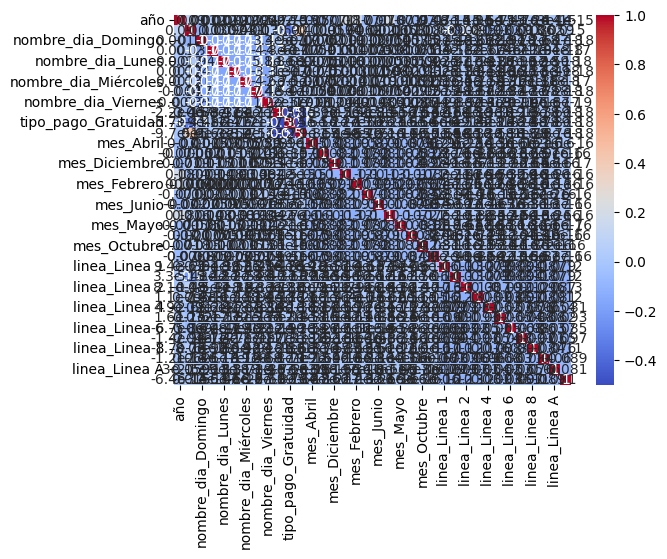

In [65]:
# Calcular la matriz de correlación
corr_matrix = vaar.corr()

# Crear un mapa de calor utilizando Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Mostrar el mapa de correlación
plt.show()

In [66]:
my_data

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


# Con los datos del 2021 y 2022 se pretende predecir los datos del 2023
Para esto se dividira en dos el data original, uno con los años 2021 y 2022, y separado de estos otro data con los datos del 2023

In [67]:
my_data_input = my_data.drop(my_data[my_data.año == 2023].index)
my_data_input

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
427045,2022-12-31,Diciembre,2022,Linea 12,Insurgentes Sur,Prepago,0,2022-12,Sábado
427046,2022-12-31,Diciembre,2022,Linea 12,Insurgentes Sur,Gratuidad,0,2022-12,Sábado
427047,2022-12-31,Diciembre,2022,Linea 12,Mixcoac,Boleto,0,2022-12,Sábado
427048,2022-12-31,Diciembre,2022,Linea 12,Mixcoac,Prepago,0,2022-12,Sábado


In [68]:
my_data_output = my_data[my_data['año'] == 2023]
my_data_output

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia
427050,2023-01-01,Enero,2023,Linea 1,Pantitlán,Boleto,0,2023-01,Domingo
427051,2023-01-01,Enero,2023,Linea 1,Pantitlán,Prepago,0,2023-01,Domingo
427052,2023-01-01,Enero,2023,Linea 1,Pantitlán,Gratuidad,0,2023-01,Domingo
427053,2023-01-01,Enero,2023,Linea 1,Zaragoza,Boleto,0,2023-01,Domingo
427054,2023-01-01,Enero,2023,Linea 1,Zaragoza,Prepago,0,2023-01,Domingo
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


In [69]:
print(vaar.columns)

Index(['año_mes_dia', 'año', 'estacion', 'afluencia', 'año_mes',
       'nombre_dia_Domingo', 'nombre_dia_Jueves', 'nombre_dia_Lunes',
       'nombre_dia_Martes', 'nombre_dia_Miércoles', 'nombre_dia_Sábado',
       'nombre_dia_Viernes', 'tipo_pago_Boleto', 'tipo_pago_Gratuidad',
       'tipo_pago_Prepago', 'mes_Abril', 'mes_Agosto', 'mes_Diciembre',
       'mes_Enero', 'mes_Febrero', 'mes_Julio', 'mes_Junio', 'mes_Marzo',
       'mes_Mayo', 'mes_Noviembre', 'mes_Octubre', 'mes_Septiembre',
       'linea_Linea 1', 'linea_Linea 12', 'linea_Linea 2', 'linea_Linea 3',
       'linea_Linea 4', 'linea_Linea 5', 'linea_Linea 6', 'linea_Linea 7',
       'linea_Linea 8', 'linea_Linea 9', 'linea_Linea A', 'linea_Linea B'],
      dtype='object')


In [70]:
my_data

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


In [71]:
df_label_encoding = my_data

In [72]:
df_label_encoding

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes
...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes


In [73]:
lineas_unicas_ordenadas = sorted(df_label_encoding['linea'].unique())
estaciones_unicas_ordenadas = sorted(df_label_encoding['estacion'].unique())
meses_unicos_ordenados = sorted(df_label_encoding['mes'].unique())
nombre_dias_ordenados = sorted(df_label_encoding['nombre_dia'].unique())
años_ordenados = sorted(df_label_encoding['año'].unique())
tipos_de_pago_ordenados = sorted(df_label_encoding['tipo_pago'].unique()) 

print(lineas_unicas_ordenadas)
print(estaciones_unicas_ordenadas)

['Linea 1', 'Linea 12', 'Linea 2', 'Linea 3', 'Linea 4', 'Linea 5', 'Linea 6', 'Linea 7', 'Linea 8', 'Linea 9', 'Linea A', 'Linea B']
['Acatitla', 'Aculco', 'Agrícola Oriental', 'Allende', 'Apatlaco', 'Aquiles Serdán', 'Aragón', 'Atlalilco', 'Auditorio', 'Autobuses del Norte', 'Azcapotzalco', 'Balbuena', 'Balderas', 'Barranca del Muerto', 'Bellas Artes', 'Bondojito', 'Bosque de Aragón', 'Boulevard Puerto Aéreo', 'Buenavista', 'Calle 11', 'Camarones', 'Canal de San Juan', 'Canal del Norte', 'Candelaria', 'Centro Médico', 'Cerro de la Estrella', 'Chabacano', 'Chapultepec', 'Chilpancingo', 'Ciudad Azteca', 'Ciudad Deportiva', 'Colegio Militar', 'Constitución de 1917', 'Constituyentes', 'Consulado', 'Copilco', 'Coyoacán', 'Coyuya', 'Cuatro Caminos', 'Cuauhtémoc', 'Cuitláhuac', 'Culhuacán', 'Deportivo 18 de Marzo', 'Deportivo Oceanía', 'División del Norte', 'Doctores', 'Ecatepec', 'Eduardo Molina', 'Eje Central', 'El Rosario', 'Ermita', 'Escuadrón 201', 'Etiopía/Plaza de la Transparencia', 

In [74]:
from sklearn.preprocessing import OrdinalEncoder

# Crea una instancia de OrdinalEncoder y especifica el orden de las categorías
encoder = OrdinalEncoder(categories = [lineas_unicas_ordenadas, estaciones_unicas_ordenadas, meses_unicos_ordenados, nombre_dias_ordenados, años_ordenados, tipos_de_pago_ordenados])


In [75]:
# Codifica las columnas "linea" y "estacion"
df_label_encoding[['linea_encoded', 'estacion_encoded', 'mes_encoded', 'nombre_dia_encoded','años_encoded','tipo_pago_encoded']] = encoder.fit_transform(df_label_encoding[['linea', 'estacion','mes', 'nombre_dia','año','tipo_pago']])


In [76]:
df_label_encoding 

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia,linea_encoded,estacion_encoded,mes_encoded,nombre_dia_encoded,años_encoded,tipo_pago_encoded
0,2021-01-01,Enero,2021,Linea 1,Balbuena,Boleto,1848,2021-01,Viernes,0.0,11.0,3.0,6.0,0.0,0.0
1,2021-01-01,Enero,2021,Linea 1,Balbuena,Prepago,790,2021-01,Viernes,0.0,11.0,3.0,6.0,0.0,2.0
2,2021-01-01,Enero,2021,Linea 1,Balbuena,Gratuidad,325,2021-01,Viernes,0.0,11.0,3.0,6.0,0.0,1.0
3,2021-01-01,Enero,2021,Linea 1,Balderas,Boleto,1103,2021-01,Viernes,0.0,12.0,3.0,6.0,0.0,0.0
4,2021-01-01,Enero,2021,Linea 1,Balderas,Prepago,922,2021-01,Viernes,0.0,12.0,3.0,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes,1.0,69.0,7.0,6.0,2.0,2.0
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes,1.0,69.0,7.0,6.0,2.0,1.0
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes,1.0,90.0,7.0,6.0,2.0,0.0
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes,1.0,90.0,7.0,6.0,2.0,2.0


In [77]:
my_data_input = df_label_encoding[df_label_encoding['año'] != 2023]
my_data_output = df_label_encoding[df_label_encoding['año'] == 2023]

In [78]:
columnas_a_eliminar = ['mes', 'linea', 'estacion', 'tipo_pago', 'nombre_dia']
my_data_input = my_data_input.drop(columnas_a_eliminar, axis=1)
# my_data_output = my_data_output.drop(columnas_a_eliminar, axis=1)

In [79]:
my_data_output.tail()

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia,linea_encoded,estacion_encoded,mes_encoded,nombre_dia_encoded,años_encoded,tipo_pago_encoded
479695,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Prepago,19844,2023-03,Viernes,1.0,69.0,7.0,6.0,2.0,2.0
479696,2023-03-31,Marzo,2023,Linea 12,Insurgentes Sur,Gratuidad,2306,2023-03,Viernes,1.0,69.0,7.0,6.0,2.0,1.0
479697,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Boleto,0,2023-03,Viernes,1.0,90.0,7.0,6.0,2.0,0.0
479698,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Prepago,8919,2023-03,Viernes,1.0,90.0,7.0,6.0,2.0,2.0
479699,2023-03-31,Marzo,2023,Linea 12,Mixcoac,Gratuidad,579,2023-03,Viernes,1.0,90.0,7.0,6.0,2.0,1.0


In [80]:
my_data_output.head(4)

,año_mes_dia,mes,año,linea,estacion,tipo_pago,afluencia,año_mes,nombre_dia,linea_encoded,estacion_encoded,mes_encoded,nombre_dia_encoded,años_encoded,tipo_pago_encoded
427050,2023-01-01,Enero,2023,Linea 1,Pantitlán,Boleto,0,2023-01,Domingo,0.0,107.0,3.0,0.0,2.0,0.0
427051,2023-01-01,Enero,2023,Linea 1,Pantitlán,Prepago,0,2023-01,Domingo,0.0,107.0,3.0,0.0,2.0,2.0
427052,2023-01-01,Enero,2023,Linea 1,Pantitlán,Gratuidad,0,2023-01,Domingo,0.0,107.0,3.0,0.0,2.0,1.0
427053,2023-01-01,Enero,2023,Linea 1,Zaragoza,Boleto,0,2023-01,Domingo,0.0,162.0,3.0,0.0,2.0,0.0


In [81]:
my_data_input.head(4)

,año_mes_dia,año,afluencia,año_mes,linea_encoded,estacion_encoded,mes_encoded,nombre_dia_encoded,años_encoded,tipo_pago_encoded
0,2021-01-01,2021,1848,2021-01,0.0,11.0,3.0,6.0,0.0,0.0
1,2021-01-01,2021,790,2021-01,0.0,11.0,3.0,6.0,0.0,2.0
2,2021-01-01,2021,325,2021-01,0.0,11.0,3.0,6.0,0.0,1.0
3,2021-01-01,2021,1103,2021-01,0.0,12.0,3.0,6.0,0.0,0.0


In [82]:
print(my_data_input['afluencia'].dtype)
print(my_data_input['estacion_encoded'].dtype)

int64
float64


In [83]:
my_data_input['afluencia'] = my_data_input['afluencia'].astype(float)

In [84]:
print(my_data_input['afluencia'].dtype)
print(my_data_input['estacion_encoded'].dtype)

float64
float64


/var/folders/03/wk5brgrd2dscnsxmsb0687vr0000gn/T/ipykernel_36494/1340307097.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = my_data_input.corr()


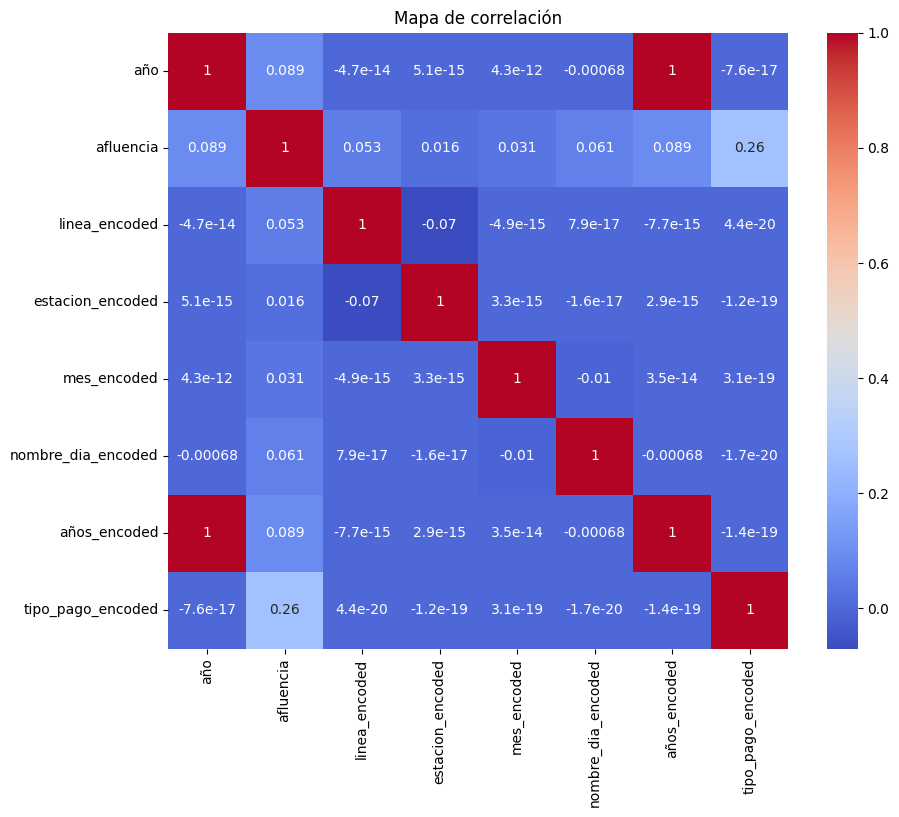

In [85]:
# Calcular la matriz de correlación
correlation_matrix = my_data_input.corr()

# Crear el mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

/var/folders/03/wk5brgrd2dscnsxmsb0687vr0000gn/T/ipykernel_36494/3612568051.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = my_data_input.corr()


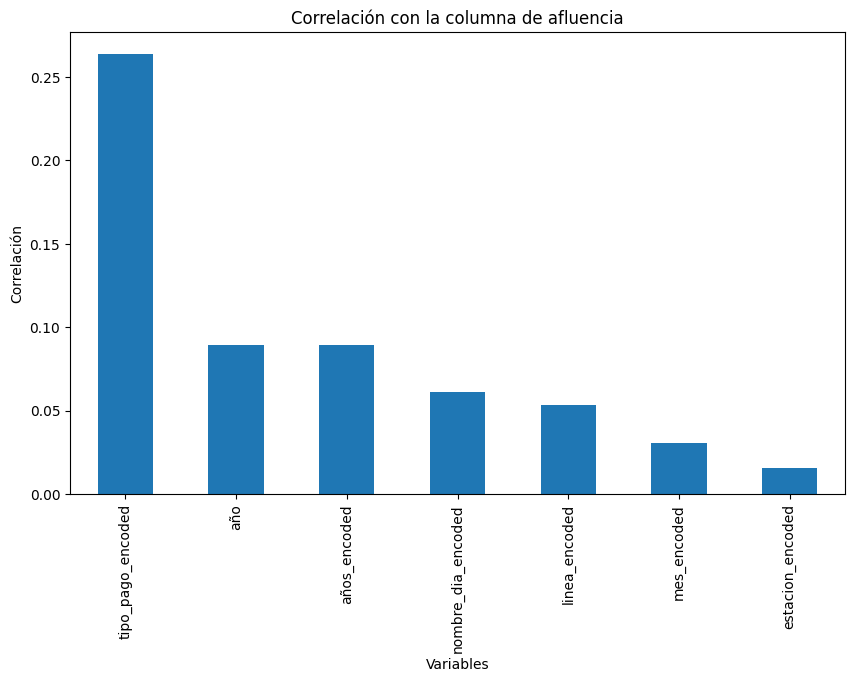

In [86]:
# Calcular la matriz de correlación
correlation_matrix = my_data_input.corr()

# Extraer las correlaciones con la columna de afluencia y ordenar en orden descendente
correlation_with_afluencia = correlation_matrix['afluencia'].drop('afluencia')
correlation_with_afluencia = correlation_with_afluencia.sort_values(ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
correlation_with_afluencia.plot(kind='bar')
plt.title('Correlación con la columna de afluencia')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

In [87]:
# Obtener la lista de nombres de columnas
columnas = correlation_with_afluencia.index.tolist()
print(columnas)

['tipo_pago_encoded', 'año', 'años_encoded', 'nombre_dia_encoded', 'linea_encoded', 'mes_encoded', 'estacion_encoded']


In [88]:
my_data_input.sample(n=5)

,año_mes_dia,año,afluencia,año_mes,linea_encoded,estacion_encoded,mes_encoded,nombre_dia_encoded,años_encoded,tipo_pago_encoded
175405,2021-10-27,2021,3326.0,2021-10,9.0,154.0,10.0,4.0,0.0,2.0
151481,2021-09-16,2021,4.0,2021-09,11.0,93.0,11.0,1.0,0.0,1.0
420362,2022-12-20,2022,522.0,2022-12,7.0,127.0,2.0,3.0,1.0,1.0
189061,2021-11-20,2021,0.0,2021-11,1.0,144.0,9.0,5.0,0.0,2.0
89901,2021-06-03,2021,863.0,2021-06,7.0,138.0,6.0,1.0,0.0,0.0


In [89]:
'''import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Convertir la columna 'año_mes_dia' a tipo DateTime
my_data_input['año_mes_dia'] = pd.to_datetime(my_data_input['año_mes_dia'])

# Obtener el número de días desde una fecha de referencia
fecha_referencia = pd.to_datetime('2000-01-01')  # Puedes ajustar la fecha de referencia según tus datos
my_data_input['dias_desde_referencia'] = (my_data_input['año_mes_dia'] - fecha_referencia).dt.days

# Dividir los datos en características (X) y variable objetivo (y)
X = my_data_input.drop(['afluencia', 'año_mes_dia', 'año_mes'], axis=1)
y = my_data_input['afluencia']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de SVR
svr = SVR()

# Entrenar el modelo
svr.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svr.predict(X_test_scaled)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)'''


'import pandas as pd\nfrom sklearn.svm import SVR\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import mean_squared_error, r2_score\n\n# Convertir la columna \'año_mes_dia\' a tipo DateTime\nmy_data_input[\'año_mes_dia\'] = pd.to_datetime(my_data_input[\'año_mes_dia\'])\n\n# Obtener el número de días desde una fecha de referencia\nfecha_referencia = pd.to_datetime(\'2000-01-01\')  # Puedes ajustar la fecha de referencia según tus datos\nmy_data_input[\'dias_desde_referencia\'] = (my_data_input[\'año_mes_dia\'] - fecha_referencia).dt.days\n\n# Dividir los datos en características (X) y variable objetivo (y)\nX = my_data_input.drop([\'afluencia\', \'año_mes_dia\', \'año_mes\'], axis=1)\ny = my_data_input[\'afluencia\']\n\n# Dividir los datos en conjuntos de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Escalar las características\nscaler

In [90]:
my_data_input

,año_mes_dia,año,afluencia,año_mes,linea_encoded,estacion_encoded,mes_encoded,nombre_dia_encoded,años_encoded,tipo_pago_encoded
0,2021-01-01,2021,1848.0,2021-01,0.0,11.0,3.0,6.0,0.0,0.0
1,2021-01-01,2021,790.0,2021-01,0.0,11.0,3.0,6.0,0.0,2.0
2,2021-01-01,2021,325.0,2021-01,0.0,11.0,3.0,6.0,0.0,1.0
3,2021-01-01,2021,1103.0,2021-01,0.0,12.0,3.0,6.0,0.0,0.0
4,2021-01-01,2021,922.0,2021-01,0.0,12.0,3.0,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
427045,2022-12-31,2022,0.0,2022-12,1.0,69.0,2.0,5.0,1.0,2.0
427046,2022-12-31,2022,0.0,2022-12,1.0,69.0,2.0,5.0,1.0,1.0
427047,2022-12-31,2022,0.0,2022-12,1.0,90.0,2.0,5.0,1.0,0.0
427048,2022-12-31,2022,0.0,2022-12,1.0,90.0,2.0,5.0,1.0,2.0


In [91]:
my_data_input.sample(3)

,año_mes_dia,año,afluencia,año_mes,linea_encoded,estacion_encoded,mes_encoded,nombre_dia_encoded,años_encoded,tipo_pago_encoded
110494,2021-07-08,2021,5594.0,2021-07,10.0,111.0,5.0,1.0,0.0,2.0
127167,2021-08-06,2021,2403.0,2021-08,3.0,64.0,1.0,6.0,0.0,0.0
214733,2022-01-03,2022,84.0,2022-01,0.0,102.0,3.0,2.0,1.0,1.0


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Preparar los datos (asegúrate de tener las columnas necesarias y codificadas)

# 2. Separar los datos en X (características) y y (objetivos)
X = my_data_input[['linea_encoded', 'estacion_encoded', 'mes_encoded', 'nombre_dia_encoded', 'años_encoded', 'tipo_pago_encoded']]
y = my_data_input['afluencia']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Seleccionar y entrenar un modelo de predicción
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Realizar predicciones
# Ejemplo de predicción para un día, estación y línea específicos
nueva_muestra = [[7.0, 137.0, 2.0, 3.0, 0.0, 0.0]]
afluencia_esperada = model.predict(nueva_muestra)

print(afluencia_esperada)


[1847.91088751]


/Users/Irving/Documents/Proyectos_con_python/Irving/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
my_data_input.head()

,año_mes_dia,año,afluencia,año_mes,linea_encoded,estacion_encoded,mes_encoded,nombre_dia_encoded,años_encoded,tipo_pago_encoded
0,2021-01-01,2021,1848.0,2021-01,0.0,11.0,3.0,6.0,0.0,0.0
1,2021-01-01,2021,790.0,2021-01,0.0,11.0,3.0,6.0,0.0,2.0
2,2021-01-01,2021,325.0,2021-01,0.0,11.0,3.0,6.0,0.0,1.0
3,2021-01-01,2021,1103.0,2021-01,0.0,12.0,3.0,6.0,0.0,0.0
4,2021-01-01,2021,922.0,2021-01,0.0,12.0,3.0,6.0,0.0,2.0


In [94]:
from tkinter import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Preparar los datos (asegúrate de tener las columnas necesarias y codificadas)

# 2. Separar los datos en X (características) y y (objetivos)
X = my_data_input[['linea_encoded', 'estacion_encoded', 'mes_encoded', 'nombre_dia_encoded', 'años_encoded', 'tipo_pago_encoded']]
y = my_data_input['afluencia']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Seleccionar y entrenar un modelo de predicción
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Crear una función para obtener la afluencia esperada
def obtener_afluencia_esperada():
    # Obtener los valores de entrada de los campos de texto
    linea = float(linea_entry.get())
    estacion = float(estacion_entry.get())
    mes = float(mes_entry.get())
    nombre_dia = float(nombre_dia_entry.get())
    años = float(años_entry.get())
    tipo_pago = float(tipo_pago_entry.get())
    
    # Crear la nueva muestra con los valores de entrada
    nueva_muestra = [[linea, estacion, mes, nombre_dia, años, tipo_pago]]
    
    # Obtener la afluencia esperada utilizando el modelo
    afluencia_esperada = model.predict(nueva_muestra)
    
    # Mostrar la afluencia esperada en el campo de resultado
    resultado_entry.delete(0, END)
    resultado_entry.insert(0, str(afluencia_esperada[0]))

# Crear la ventana de tkinter
window = Tk()
window.configure(bg='light grey')

# Agregar etiquetas y campos de entrada para cada característica
font_size = 25

linea_label = Label(window, text="Línea:", fg="black", bg="light grey", font=("Arial", font_size))
linea_label.grid(row=0, column=0)
linea_entry = Entry(window, font=("Arial", font_size))
linea_entry.grid(row=0, column=1)

estacion_label = Label(window, text="Estación:", fg="black", bg="light grey", font=("Arial", font_size))
estacion_label.grid(row=1, column=0)
estacion_entry = Entry(window, font=("Arial", font_size))
estacion_entry.grid(row=1, column=1)

mes_label = Label(window, text="Mes:", fg="black", bg="light grey", font=("Arial", font_size))
mes_label.grid(row=2, column=0)
mes_entry = Entry(window, font=("Arial", font_size))
mes_entry.grid(row=2, column=1)

nombre_dia_label = Label(window, text="Nombre Día:", fg="black", bg="light grey", font=("Arial", font_size))
nombre_dia_label.grid(row=3, column=0)
nombre_dia_entry = Entry(window, font=("Arial", font_size))
nombre_dia_entry.grid(row=3, column=1)

años_label = Label(window, text="Años:", fg="black", bg="light grey", font=("Arial", font_size))
años_label.grid(row=4, column=0)
años_entry = Entry(window, font=("Arial", font_size))
años_entry.grid(row=4, column=1)

tipo_pago_label = Label(window, text="Tipo de Pago:", fg="black", bg="light grey", font=("Arial", font_size))
tipo_pago_label.grid(row=5, column=0)
tipo_pago_entry = Entry(window, font=("Arial", font_size))
tipo_pago_entry.grid(row=5, column=1)

# Agregar un botón para obtener la afluencia esperada
calcular_button = Button(window, text="Calcular Afluencia", command=obtener_afluencia_esperada, font=("Arial", font_size))
calcular_button.grid(row=6, column=0, columnspan=2)

# Agregar una etiqueta y campo de entrada para mostrar el resultado
resultado_label = Label(window, text="Afluencia Esperada:", fg="black", bg="light grey", font=("Arial", font_size))
resultado_label.grid(row=7, column=0)
resultado_entry = Entry(window, font=("Arial", font_size))
resultado_entry.grid(row=7, column=1)

# Ejecutar el bucle principal de tkinter
window.mainloop()


/Users/Irving/Documents/Proyectos_con_python/Irving/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
